100%|██████████| 9.91M/9.91M [02:29<00:00, 66.3kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 106kB/s]
100%|██████████| 1.65M/1.65M [00:25<00:00, 64.7kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 15.8kB/s]
C:\Users\Vitavat\AppData\Local\Temp\ipykernel_22520\4118721861.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  targets = np.array(data_train.targets) # ดึง targets มาเพื่อใช้ plot กราฟ


--- Generating partition for Alpha = 0.1 ---


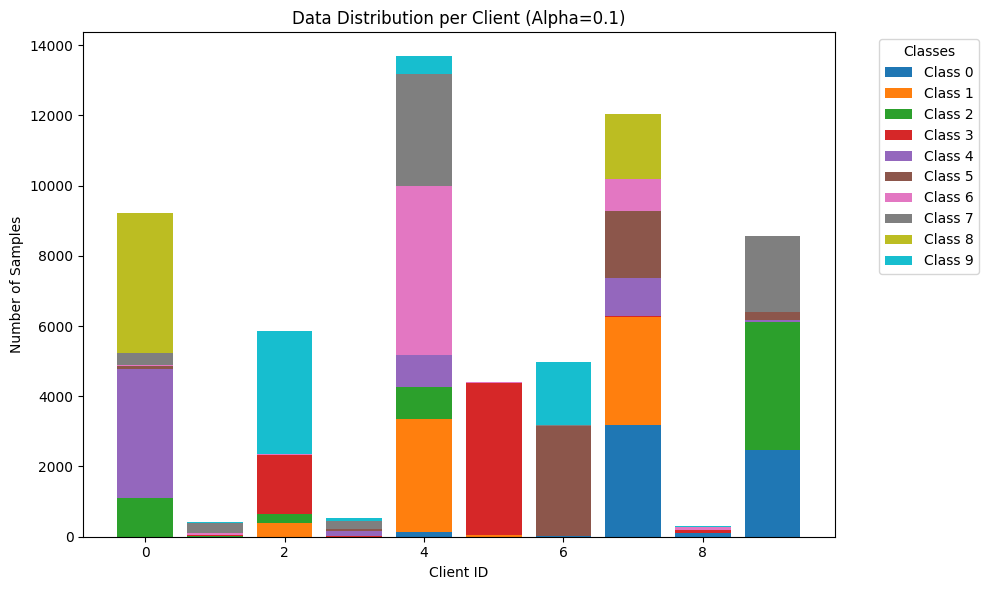

--- Generating partition for Alpha = 0.5 ---


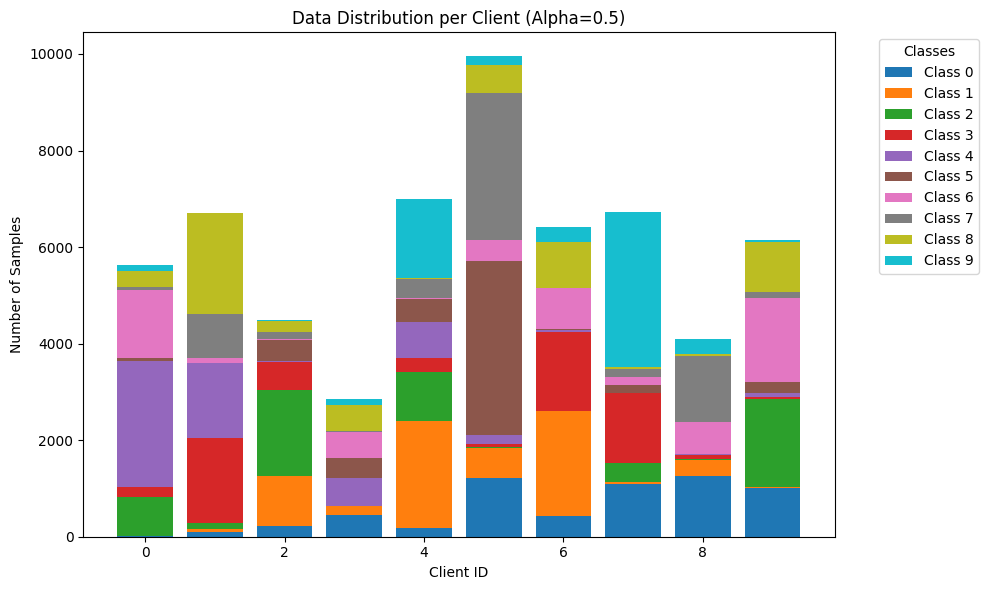

--- Generating partition for Alpha = 10.0 ---


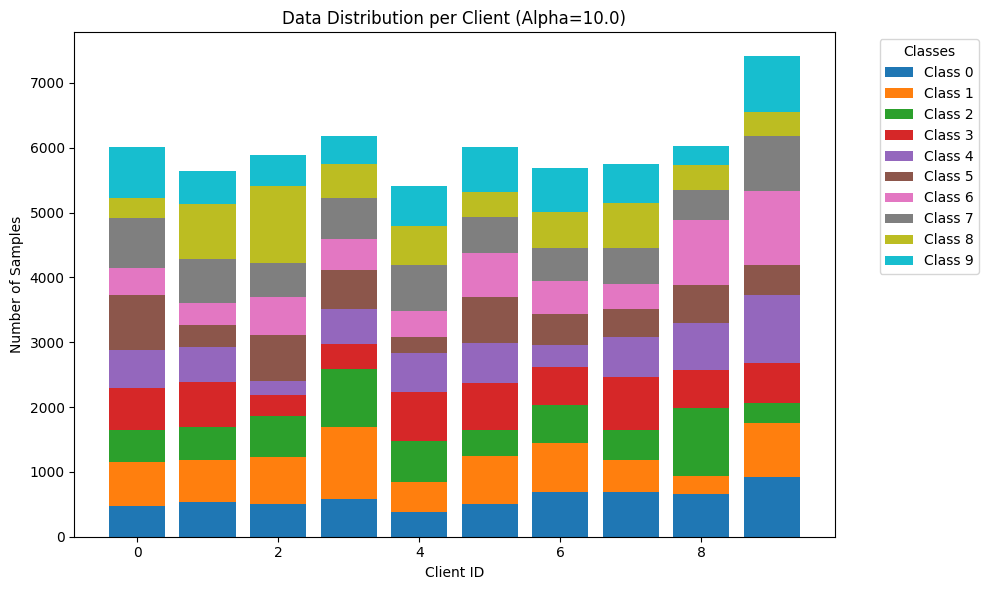

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from partition_data import partition_data_dirichlet, plot_distribution

# 1. โหลดข้อมูล MNIST
data_train = datasets.MNIST(root='./data', train=True, download=True)
targets = np.array(data_train.targets) # ดึง targets มาเพื่อใช้ plot กราฟ

# 2. กำหนดค่า Alpha ที่ต้องการทดสอบ (ตามที่ระบุใน Methodology)
alphas = [0.1, 0.5, 10.0]
num_clients = 10

for alpha in alphas:
    print(f"--- Generating partition for Alpha = {alpha} ---")
    
    # เรียกใช้ฟังก์ชันแบ่งข้อมูล
    client_indices = partition_data_dirichlet(data_train, num_clients, alpha=alpha)
    
    # แสดงผลกราฟ (นี่คือ "หลักฐาน" ความเป็น Non-IID ที่ดีที่สุดสำหรับใส่ใน Paper)
    plot_distribution(client_indices, targets, 10, num_clients, alpha)